# Visualizaition with matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gm = pd.read_csv('gapminder.tsv', sep='\t')

In [3]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710
3,Afghanistan,Asia,1967,34.020,11537966.0,836.197138
4,Afghanistan,Asia,1972,36.088,13079460.0,739.981106


### a. Line plot <a id="section2ae"/>

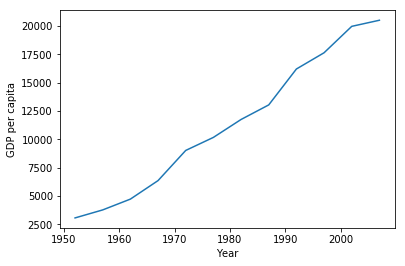

In [204]:
portugal = gm[gm['country'] == 'Portugal']
plt.plot(portugal.year, portugal.gdpPercap)
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()

### b. Bar plot <a id="section2ae"/>

In [74]:
countries = gm[['country', 'continent']]
countries = countries.drop_duplicates()
country_counts = pd.DataFrame({'n_countries' : countries.groupby('continent')['country'].count()}).reset_index()
country_counts

,continent,n_countries
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


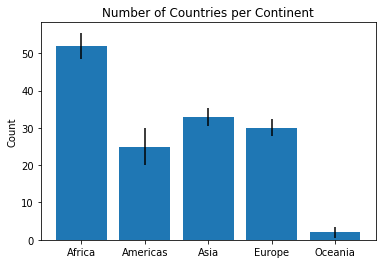

In [72]:
y_err = [3.5, 4.9, 2.4, 2.3, 1.4]
plt.bar(range(len(country_counts)), country_counts.n_countries, yerr = y_err, align='center')
plt.title('Number of Countries per Continent')
plt.xticks(country_counts['continent'].index, country_counts['continent'])
plt.ylabel('Count')
plt.show()

### c. Scatter plot <a id="section2ae"/>

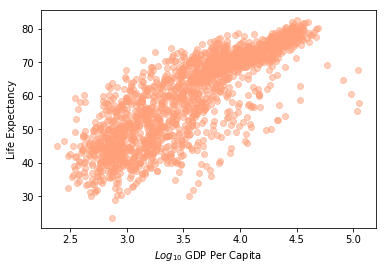

In [14]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='o', facecolor = 'lightsalmon', alpha = 0.5)
plt.xlabel('$Log_{10}$ GDP Per Capita')
plt.ylabel('Life Expectancy')
plt.show()

In [89]:
gm['decade'] = gm['year'].apply(lambda x: int(x / 10) * 10)
hexsix = ['#ffffcc', '#d9f0a3', '#addd8e', '#78c679', '#31a354', '#006837']
gm_cd = gm.groupby(['continent', 'decade'], as_index=False)['gdpPercap', 'lifeExp'].mean()

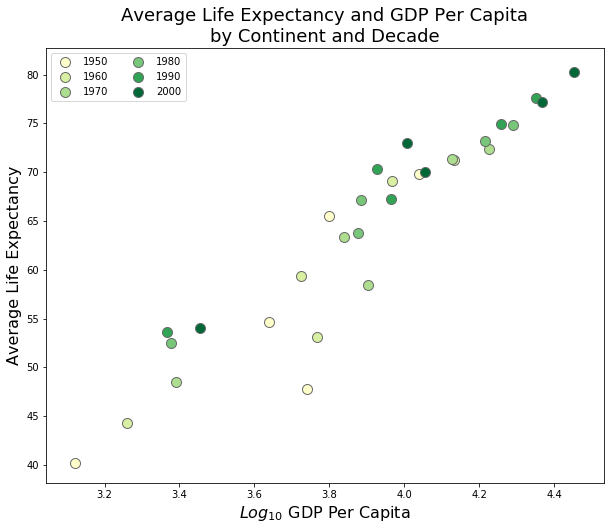

In [92]:
plt.figure(figsize=(10, 8))

for i, decade in enumerate(np.sort(gm_cd.decade.unique())):
    tdf = gm_cd[gm_cd['decade'] == decade]
    plt.scatter(np.log10(tdf['gdpPercap']),
                tdf['lifeExp'],
                s=100,
                facecolor=hexsix[i],
                alpha=1,
                edgecolor='DimGray',
                label=decade)

plt.title('Average Life Expectancy and GDP Per Capita\nby Continent and Decade', fontsize=18)
plt.ylabel('Average Life Expectancy', fontsize=16)
plt.xlabel('$Log_{10}$ GDP Per Capita', fontsize=16)
plt.legend(loc='upper left', ncol=2, scatterpoints=1)
plt.show()

### d. Box plot <a id="section2ae"/>

In [69]:
gm1972 = gm[gm['year'] == 1972]
continent_gdp_1972 = []

continents = np.sort(gm1972.continent.unique())
for c in continents:
    continent_gdp_1972.append(gm1972[gm1972['continent'] == c]['gdpPercap'].values)


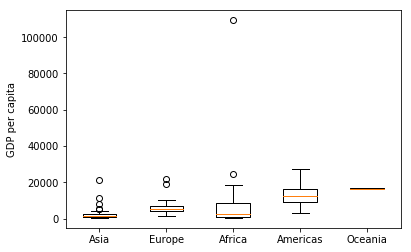

In [24]:
plt.boxplot(continent_gdp_1972)
plt.xticks(np.arange(1, 6), gm1972.continent.unique())
plt.ylabel('GDP per capita')
plt.show()

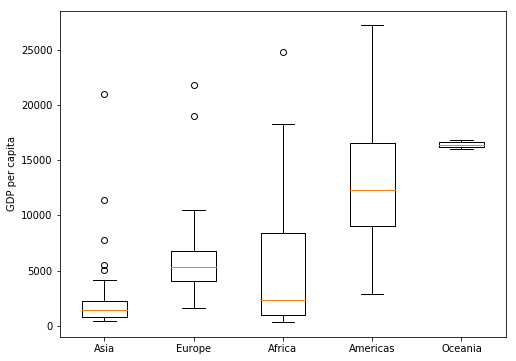

In [29]:
continent_gdp_1972[2] = continent_gdp_1972[2][continent_gdp_1972[2] < 40000]
plt.figure(figsize=(8, 6))

plt.boxplot(continent_gdp_1972)
plt.xticks(np.arange(1, 6), gm1972.continent.unique())
plt.ylabel('GDP per capita')
plt.show()

### e. Customization <a id="section2ae"/>

In [76]:
day = [0, 1, 2, 3, 5, 7, 9, 12]
glucose = [5.35, 6.24, 2.83, 3.93, 1.01, 1.16, 8.17, 0.91]
product = [18.34, 36.27, 45.45, 50.48, 73.23, 16.28, 15.43, 36.67]
y_err = [1.138, 1.180, 1.203, 1.601, 1.328, 1.296, 1.240, 1.962]

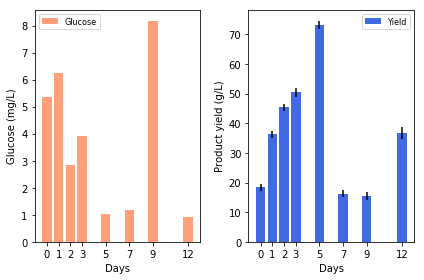

In [77]:
plt.subplot(121)
plt.bar(day, glucose, color = 'lightsalmon', label = 'Glucose')
plt.tick_params(axis = 'y')
plt.xticks(day, day)
plt.xlabel('Days')
plt.ylabel('Glucose (mg/L)')
plt.legend(fontsize = 8)

plt.subplot(122)
plt.bar(day, product, color = 'royalblue', yerr = y_err, label = 'Yield')
plt.tick_params(axis = 'y')
plt.xticks(day, day)
plt.xlabel('Days')
plt.ylabel('Product yield (g/L)')
plt.legend(fontsize = 8)

plt.tight_layout()
plt.show()

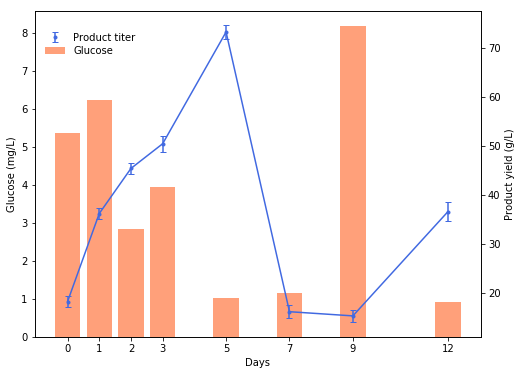

In [78]:
fig, ax1 = plt.subplots(figsize = (8, 6))

ax1.bar(day, glucose, color = 'lightsalmon', label = 'Glucose')
ax1.tick_params(axis = 'y')
plt.xticks(day, day)

ax1.set_xlabel('Days')
ax1.set_ylabel('Glucose (mg/L)')
ax1.legend(loc = [0.015, 0.85], frameon = False)

ax2 = ax1.twinx()
ax2.plot(day, product, color = 'royalblue')
ax2.errorbar(x = day, y = product, yerr = y_err, color = 'royalblue', fmt = 'o', markersize = 3, capsize = 3, label = 'Product titer')

ax2.set_ylabel('Product yield (g/L)')
ax2.legend(loc = [0.015, 0.89], frameon = False)
plt.show()